In [2]:
import pandas as pd
import numpy as np
import altair as alt

In [3]:
df = pd.read_csv("data.csv", parse_dates=['Date'])

df['average'] = df.mean(numeric_only=True, axis=1)
df['min'] = df.min(numeric_only=True, axis=1)
df['max'] = df.max(numeric_only=True, axis=1)
df['year'] = df['Date'].dt.year
df = df.drop('Date', axis=1)
df = df.groupby('year', as_index=False).mean()
#df['is_inverted'] = np.where(df['1 Mo']>df['30 Yr'], 'green', 'red')

df = df[['year', 'average', 'min', 'max']]
df

,year,average,min,max
0,1990,8.217831,7.744560,8.634120
1,1991,6.827747,5.539600,8.139160
2,1992,5.403679,3.514343,7.665976
3,1993,4.637944,3.066000,6.628360
4,1994,6.227382,4.372490,7.490080
5,1995,6.311468,5.642520,6.954680
6,1996,6.029373,5.134603,6.826111
7,1997,6.051612,5.201440,6.686840
8,1998,5.223468,4.877680,5.715960
9,1999,5.478586,4.776454,6.197809


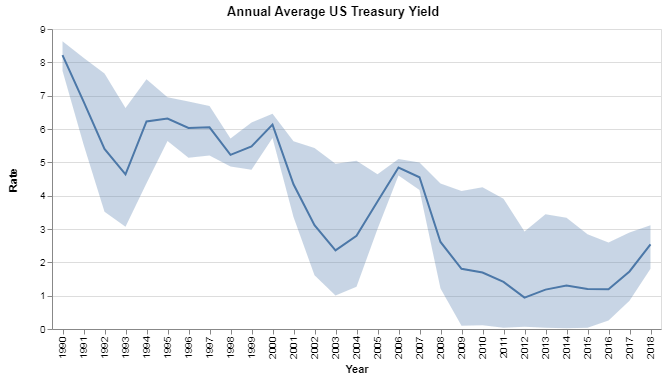

In [6]:
base = alt.Chart(df).encode(
    x=alt.X('year:O', axis=alt.Axis(title='Year'))
).properties(
    title='Annual Average US Treasury Yield'
)

line = base.mark_line().encode(
    y='average'
)

band = base.mark_area(opacity=0.3).encode(
    y=alt.Y('min', axis=alt.Axis(title='Rate')),
    y2='max'
)

chart = line + band
chart

In [7]:
chart.save('rates.html')